Haberman Dataset dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load haberman.csv.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")

#### No of data-points, No of features 

In [4]:
print (haberman.shape)

(306, 4)


#### Name of the columns in the data set

In [5]:
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [6]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


##### The data has no null values ot missing values 
* data set is clean

In [7]:
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


* By using decsride we can know count,mean, sdt, percentile etc


#### Non-Graphical Univariate Analysis:
* Number of classes,Data-points per class

In [8]:
haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

#### Survival status (class attribute)
* 1 = the patient survived 5 years or longer
* 2 = the patient died within 5 year
* haberman is a Imbalanced dataset as the number of data points for class are different

### Objective :
#### Our main objective is to find a  patient who can survive by using some of the features like: 
* 1. Age of patient at the time of operation (age column)
* 2. Patient's year of operation (year column)
* 3. Number of positive axillary nodes detected (node column)


# Univariate analysis 
## 1-D Scatter plot

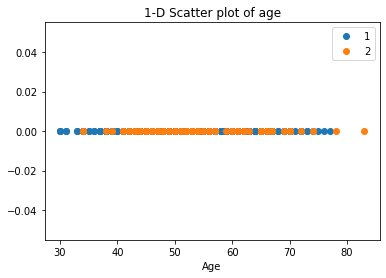

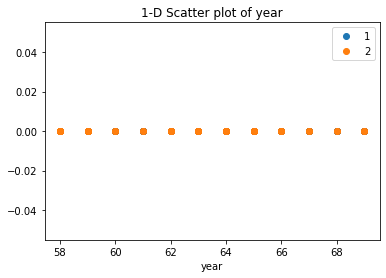

1-D scatter plot of nodes


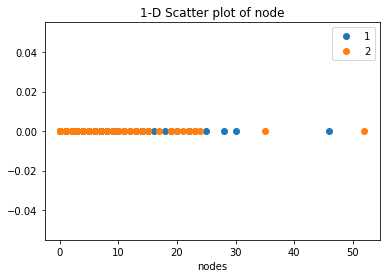

In [9]:
import numpy as np
haberman_one = haberman.loc[haberman['status']== 1]
haberman_two = haberman.loc[haberman['status']== 2]


plt.plot(haberman_one["age"],np.zeros_like(haberman_one["age"]),'o')
plt.plot(haberman_two["age"],np.zeros_like(haberman_two["age"]),'o')
plt.xlabel("Age")
plt.title("1-D Scatter plot of age")
plt.legend(["1","2"])
plt.show()


plt.plot(haberman_one["year"],np.zeros_like(haberman_one["year"]),'o')
plt.plot(haberman_two["year"],np.zeros_like(haberman_two["year"]),'o')
plt.xlabel("year")
plt.title("1-D Scatter plot of year")
plt.legend(["1","2"])
plt.show()

print("1-D scatter plot of nodes")
plt.plot(haberman_one["nodes"],np.zeros_like(haberman_one["nodes"]),'o')
plt.plot(haberman_two["nodes"],np.zeros_like(haberman_two["nodes"]),'o')
plt.xlabel("nodes")
plt.legend(["1","2"])
plt.title("1-D Scatter plot of node")
plt.show()

### Observations:
#### In above 3 case 
* 1-D scatter plot of age,year,nodes. we can't determined because point in the plot are overlapping more. lets try with PDF or CDF fot better clarification

## PDF

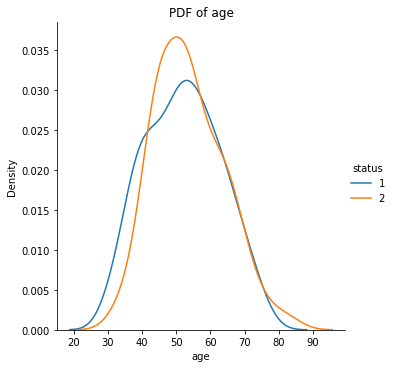

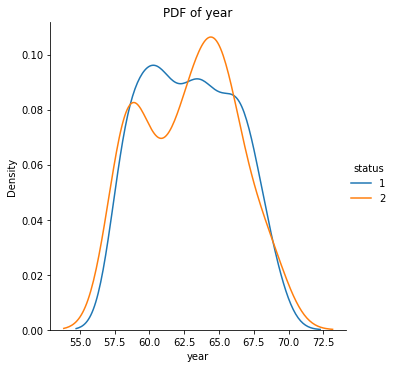

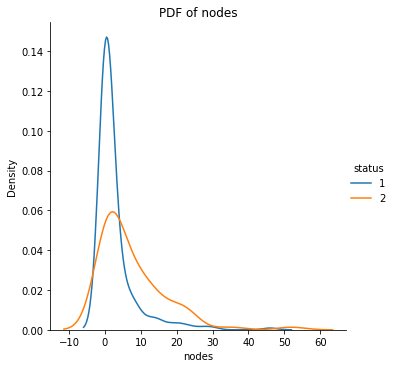

In [10]:
g = sns.FacetGrid(haberman, hue="status", height=5)
g.map(sns.kdeplot, "age").add_legend()
plt.title("PDF of age")
plt.show()

h = sns.FacetGrid(haberman, hue="status", height=5)
h.map(sns.kdeplot, "year").add_legend()
plt.title("PDF of year")
plt.show()

I = sns.FacetGrid(haberman, hue="status", height=5)
I.map(sns.kdeplot, "nodes").add_legend()
plt.title("PDF of nodes")
plt.show()

### Observations:
* As we observer the pdf of the age, year, nodes 1 and 2 status are overlapped in each graph but by seeing all graphs, pdf of nodes is slightly better than the other two because, at some particular point, we can say some have less axillary nodes lived long
* There are more chances to live more, if the axillary  nodes are >= 4, we can also tell that people have more than 3.5 axillary nodes died early

## CDF

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


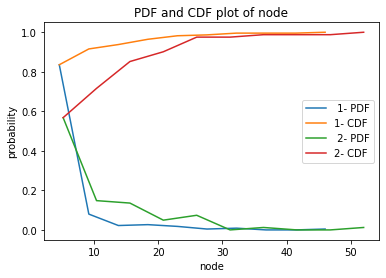

In [11]:
#status 1
counts, bin_edges = np.histogram(haberman_one['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#status 2
counts, bin_edges = np.histogram(haberman_two['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel("node")
plt.ylabel("probability")
plt.title("PDF and CDF plot of node")

plt.legend([" 1- PDF","1- CDF"," 2- PDF","2- CDF"])
plt.show();

### Observations:
##### Status 1 and 2's CDF and PDF are overlapped in node 
* we can conclude CDF's nodes > age >year  are better
* From plot of node : 85% patients having less than 5 nodes (axial positive lymph) of 1 ( survived 5 years or longer)
* 55% of people are in status 2 (short life) their axial nodes are less than 5 
* Finally we can say if a person has axial nodes are more than 40 the survived short period


## Boxplot 

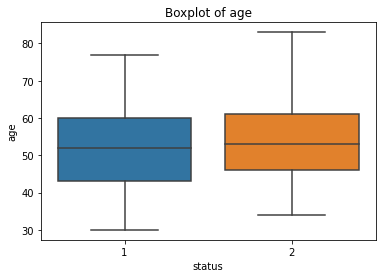

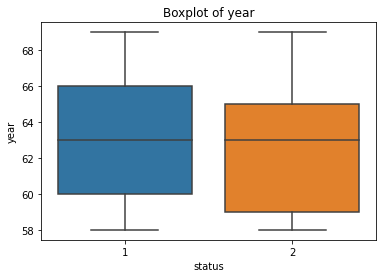

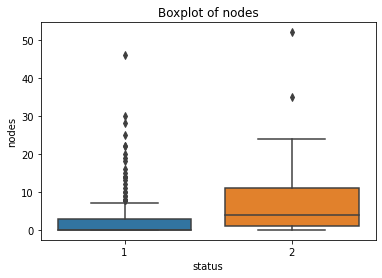

In [12]:
sns.boxplot(x='status',y='age', data=haberman)
plt.title("Boxplot of age")
plt.show()
sns.boxplot(x='status',y='year', data=haberman)
plt.title("Boxplot of year")
plt.show()
sns.boxplot(x='status',y='nodes', data=haberman)
plt.title("Boxplot of nodes")
plt.show()

### Observations:
#### BOX PLOT OF AGE, YEAR, NODES
* In the age plot, there is almost <95 error
* year plot is same as age, year is worst than age
* In nodes plot there is almost 65% error, node plot is better than other two


##  Violin Plot

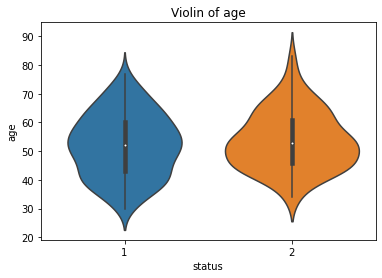

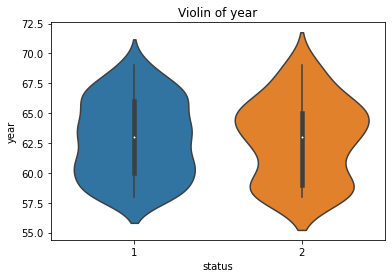

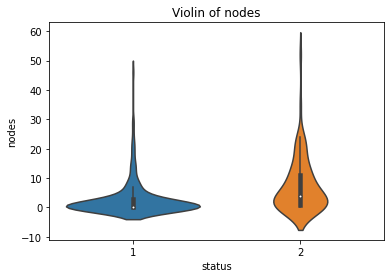

In [13]:
sns.violinplot(x="status", y="age", data=haberman, height=8)
plt.title("Violin of age")
plt.show()

sns.violinplot(x="status", y="year", data=haberman, height=8)
plt.title("Violin of year")
plt.show()

sns.violinplot(x="status", y="nodes", data=haberman, height=8)
plt.title("Violin of nodes")
plt.show()


### Observations:
* It is a combination of the histogram (pdf) and box plot.
* we can say node Violin plot is better to compare to others
* 1 (long survive) has more density when nodes is 0 to 7


# Bi-variate analysis
## 2-D Scatter plot 

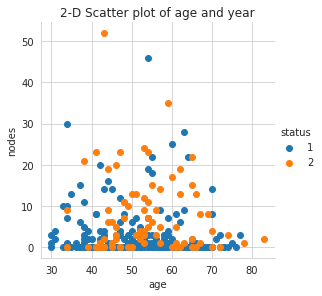

In [14]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status",height=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title("2-D Scatter plot of age and year")
plt.show();

### Observations
* most of the nodes are lies are at 0.It means people have 0 nodes lived long  
* we can't determine because most of the points are overlapped to each other and we have to check other variable pairs, so we use a pair plot for all possibility


## Pair-plot

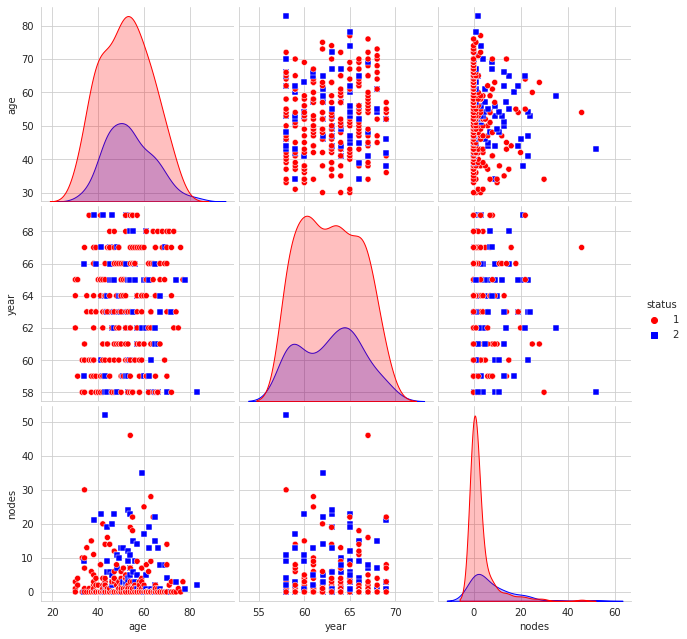

In [15]:
plt.close();
sns.set_style("whitegrid");

sns.pairplot(haberman, hue="status",markers=["o", "s"],palette=["r","b"],height=3);
plt.show()

## Observations: 
* Status 1 and 2 are overlapped in each graph, So it is very difficult to determine
* As we can see (age, nodes) or (nodes, age) here more red point are grouped, we also new 1 have more point than 2. we  draw a line parallel to the y axis, we can separation 1 and 2 (partially)

## Contour plot

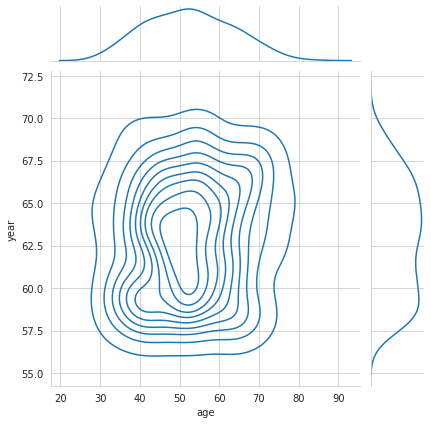

In [18]:
sns.jointplot(x="age", y="year", data=haberman, kind="kde");
plt.show()



#### Observations:
* More people had an operation during the year 1959 - 1964 and between the ages 42 - 60
* Similarly, we can try with the other variables

###  Conclusions:
* There are 306 observations with 4 variables in this data set
* features such as age, year, nodes, status. Here we assumed status as a class. the given data set is clean doesn't contain missing values.
* The given data is imbalance because status has two values 1, 2 where 1 = the patient survived 5 years or longer,2 = the patient died within 5 year
* Our main objective is to find a patient who can survive by using some of the features like Age of the patient at the time of operation, the Patient's year of operation, the number of positive axillary nodes detected
* Univariate analysis 1-D Scatter plot we can see points are overlapped to each other. it doesn't help
* Probability Density Functions (PDF) we can conclude that age and year are not useful for both people who survived and also dead. The node might help us for analysis for example There are more chances to live more, if the axillary nodes are less than 4, we can also tell that people have more than 3.5 axillary nodes died early
* Cumulative Distribution Functions (CDF) we observed node pdf is best than others. so cdf of nodes will help us, 85% of patients, having less than 5 nodes has survived 5 years or longer, 55% of people are in status 2 (short life) their axial nodes are less than 5
* Box plot and Violin Plot from this plot we can say that people having  0 to 7 nodes are high dense and dead have ages between 46-62, the year between 59-65, and the patients who survived have ages between 42-60, a year between 60-66. 
* 2-D Scatter plot (Bi-variate analysis) we get to know that people who have 0 nodes survived long. We cannot determine people with status 1 or 2 
* Pair-plot (Bi-variate analysis) age vs nodes and nodes vs age here more red points are grouped, where age vs year getting worse than other so it does not help us. 
* Contour plot we can assume 1956-1964 years had an operation at age (42-60)






# THANK  YOU